[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MridulaMaddukuri/Pytorch_Tutorial/blob/master/Pytorch_Basics.ipynb)

## Pytorch Basics


#### 1. What are tensors?
#### 2. Creating Tensors
#### 3. Tensor Data types
#### 4. Indexing Tensors
#### 5. Tensor Manipulation 
#### 6. Operations on tensors
#### 7. Matrix/Vector Operations 
#### 8. Conversion from and to Numpy
#### 9. Performance : Numpy arrays vs tensors on CPU vs tensors on GPU
#### 10. What are Variables?
#### 11. Activation Funtions












---











## Pytorch 

A Deep Learning framework that provides 

- Tensors (a replacement for numpy arrays) with strong GPU acceleration 
- Dynamic Neural Networks (with GPU acceleration)

Both features useful in Deep Learning projects 


#### Comparing with the other popular DL framework: TensorFlow

> - Relatively new when compared to ***_TensorFlow_*** but quickly gaining momentum. 
Easier to adapt to Pytorch due to similarities with numpy.  

> - More pythonic 

> - Offers flexibility to change the NN as you go : change and execute nodes as you go




More Pros and Cons can be found in this blog:

https://towardsdatascience.com/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b




In [2]:
# install pytorch
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl

    100% |████████████████████████████████| 592.3MB 45.9MB/s 


In [0]:
# import libraries
import torch
import numpy as np

### 1. What are tensors? 

A replacement for NumPy to use the power of GPUs 


### 2. Creating Tensors

In [3]:
x = torch.Tensor(2,2)
print("Shape of tensor x:" + str(x.shape))
print("Datatype of x:" + str(type(x)))
print(x) # uninitialized tensor holding garbage values

Shape of tensor x:torch.Size([2, 2])
Datatype of x:<class 'torch.FloatTensor'>

1.00000e-19 *
  0.0000  0.0000
  1.3563  1.3994
[torch.FloatTensor of size 2x2]



In [4]:
torch.manual_seed(2) # to make results reproducible


x = torch.rand(2,3)  # returns tensor of shape (2,3) filled with random numbers from a uniform distribution on interval [0,1)
#torch.rand? # uncomment to know more

y = torch.randn(2,3) # returns a tensor of shape (2,3) filled with random numbers from standard normal distribution : mean =0 , variance = 1

#torch.randn? # uncomment to know more

print(x,y)
# if you want these tensors on GPU
x,y = x.cuda(),y.cuda()
print(x,y)


 0.6147  0.3810  0.6371
 0.4745  0.7136  0.6190
[torch.FloatTensor of size 2x3]
 
-2.1409 -0.5534 -0.5000
-0.0815 -0.1633  1.5277
[torch.FloatTensor of size 2x3]


 0.6147  0.3810  0.6371
 0.4745  0.7136  0.6190
[torch.cuda.FloatTensor of size 2x3 (GPU 0)]
 
-2.1409 -0.5534 -0.5000
-0.0815 -0.1633  1.5277
[torch.cuda.FloatTensor of size 2x3 (GPU 0)]



In [5]:
# Initialize with a range of values

x = torch.arange(5)
print("arange starting with 0: ")
print(x)

x = torch.arange(2,20, step = 4)
print("arange starting with a specific value: ")
print(x)



# Initialize on a scale
x = torch.linspace(0,20, steps = 6) # includes 0 and 20
print("linspace between a and b with n steps: ")
print(x)



arange starting with 0: 

 0
 1
 2
 3
 4
[torch.FloatTensor of size 5]

arange starting with a specific value: 

  2
  6
 10
 14
 18
[torch.FloatTensor of size 5]

linspace between a and b with n steps: 

  0
  4
  8
 12
 16
 20
[torch.FloatTensor of size 6]



### 3. Tensor Data Types 

(https://pytorch.org/docs/stable/tensor_attributes.html) 


Common ones we work with: 

**FloatTensor** : Equivalent to numpy.float32


**LongTensor** : Equivalent to numpy.int64


In [6]:
x = torch.randn([2,3])
print("Original x: ")
print(x)
# convert floattensor to long tensor

x = x.type(torch.LongTensor)
print("Datatype modified x: ")
print(x)


# converting data type of a tensor based on another tensor
y = torch.rand([2,2])
print("Original y: ")
print(y)

y = y.type_as(x) # tensor x used as reference to change dtype
print("Datatype of y modified based on x: ")
print(y)






Original x: 

-0.4023  0.0972 -0.5682
-1.2692  0.5789 -1.5181
[torch.FloatTensor of size 2x3]

Datatype modified x: 

 0  0  0
-1  0 -1
[torch.LongTensor of size 2x3]

Original y: 

 0.0458  0.1755
 0.6177  0.8291
[torch.FloatTensor of size 2x2]

Datatype of y modified based on x: 

 0  0
 0  0
[torch.LongTensor of size 2x2]



**_Why is this important?_**

-- For operations between tensors, they should strictly have the same data type.

-- Certain functions are also very specific about the datatypes

### 4. Indexing Tensors

Very similar to numpy indexing

In [8]:
## 2D tensor

x = torch.randn(5,3).type(torch.FloatTensor)
print(x)

print("Indexing the second column")
print(x[:,1])

print("Indexing the 2nd element of the 4th row")
print(x[3,1])



 1.1125 -0.7474  1.4220
-0.5941  0.7546  0.5748
-0.8063  0.6410  0.7828
 1.6251  0.1756 -0.8472
-0.8448 -0.8347 -0.7278
[torch.FloatTensor of size 5x3]

Indexing the second column

-0.7474
 0.7546
 0.6410
 0.1756
-0.8347
[torch.FloatTensor of size 5]

Indexing the 2nd element of the 4th row
0.17558613419532776


In [47]:
## 3D tensor

y = torch.randn(1,5,3).type(torch.FloatTensor)
print(y)

print("Indexing the 5X3 tensor from y: ")
print(y[0,:,:])

print("Indexing the 1X3 tensor from y:")
print(y[:,0,:])

print("Indexing the size 3 tensor from y:")
print(y[0,0,:])


(0 ,.,.) = 
 -0.0602 -0.8961  0.8293
 -0.5403  0.5956 -0.7712
  0.0709 -0.8890 -1.6091
  0.5055  0.9108  0.8569
 -1.0442  0.1758  0.6451
[torch.FloatTensor of size 1x5x3]

Indexing the 5X3 tensor from y: 

-0.0602 -0.8961  0.8293
-0.5403  0.5956 -0.7712
 0.0709 -0.8890 -1.6091
 0.5055  0.9108  0.8569
-1.0442  0.1758  0.6451
[torch.FloatTensor of size 5x3]

Indexing the 1X3 tensor from y:

-0.0602 -0.8961  0.8293
[torch.FloatTensor of size 1x3]

Indexing the 3 tensor from y:

-0.0602
-0.8961
 0.8293
[torch.FloatTensor of size 3]



### 5. Tensor Manipulation 

In [3]:

x = torch.arange(9)
print(x)
print(x.shape)


# Squeeze and unsqueeze : to add or remove a dimension
print("Unsqueeze on the first axis to get a row vector: ")
x = torch.unsqueeze(x,0) 
print(x) 

print("Squeeze to get rid of the additional dimension: ")
x= torch.squeeze(x,0) # specify squeeze dimension: the dimension we want to get rid of 
print(x)

print("Unsqueeze on the second axis to get a column vector: ")
x = torch.unsqueeze(x,1) 
print(x)

# View : similar to numpy.reshape
print("Reshape the tensor: ")
x = x.view(3,3) 
print(x)




 0
 1
 2
 3
 4
 5
 6
 7
 8
[torch.FloatTensor of size 9]

torch.Size([9])
Unsqueeze on the first axis to get a row vector: 

    0     1     2     3     4     5     6     7     8
[torch.FloatTensor of size 1x9]

Squeeze to get rid of the additional dimension: 

 0
 1
 2
 3
 4
 5
 6
 7
 8
[torch.FloatTensor of size 9]

Unsqueeze on the second axis to get a column vector: 

    0
    1
    2
    3
    4
    5
    6
    7
    8
[torch.FloatTensor of size 9x1]

Reshape the tensor: 

 0  1  2
 3  4  5
 6  7  8
[torch.FloatTensor of size 3x3]



In [10]:
# Concatenation
print("Concatenate in the 0th dimension:")
print(torch.cat((x,x),0))

print("Concatenate in the 1st dimension:")
print(torch.cat((x,x),1))

Concatenate in the 0th dimension:

 0  1  2
 3  4  5
 6  7  8
 0  1  2
 3  4  5
 6  7  8
[torch.FloatTensor of size 6x3]

Concatenate in the 1st dimension:

 0  1  2  0  1  2
 3  4  5  3  4  5
 6  7  8  6  7  8
[torch.FloatTensor of size 3x6]



In [11]:
# Stacking
print("Stacking on 0th dimension: ")
print(torch.stack((x,x),0))

print("Stacking on first dimension: ")
print(torch.stack((x,x),1))

Stacking on 0th dimension: 

(0 ,.,.) = 
  0  1  2
  3  4  5
  6  7  8

(1 ,.,.) = 
  0  1  2
  3  4  5
  6  7  8
[torch.FloatTensor of size 2x3x3]

Stacking on first dimension: 

(0 ,.,.) = 
  0  1  2
  0  1  2

(1 ,.,.) = 
  3  4  5
  3  4  5

(2 ,.,.) = 
  6  7  8
  6  7  8
[torch.FloatTensor of size 3x2x3]



### 6. Operations on Tensors

In [12]:
x= torch.randn(2,3)
print(x)

print("Get absolute values")
print(torch.abs(x))


print("Get the over all mean")
print(torch.mean(x))


print("Get the means in the first dimension: ")
print(torch.mean(x,0))

print("Get element wise square: ")
print(x.pow(2))


-1.7490  1.3883 -0.1098
 1.2384  0.5407  0.5787
[torch.FloatTensor of size 2x3]

Get absolute values

 1.7490  1.3883  0.1098
 1.2384  0.5407  0.5787
[torch.FloatTensor of size 2x3]

Get the over all mean
0.3145650302370389
Get the means in the first dimension: 

-0.2553
 0.9645
 0.2345
[torch.FloatTensor of size 3]

Get element wise square: 

 3.0590  1.9274  0.0121
 1.5336  0.2924  0.3349
[torch.FloatTensor of size 2x3]



### 7. Matrix/Vector Operations

In [13]:
## MATRICES 
x = torch.ones(2,2)

y = torch.rand(2,2)

print(x,y)


# addition
print("Sum of x and y: ")
Sum = x+y
print(Sum)


# element wise multiplication
print("Element wise multiplication of x and y:")
mul = torch.mul(x,y)
print(mul)

# Matrix multiplication 
print("Matrix multiplication of x and y: ")
MatMul = x.mm(y)
print(MatMul)





 1  1
 1  1
[torch.FloatTensor of size 2x2]
 
 0.8177  0.8756
 0.0064  0.5755
[torch.FloatTensor of size 2x2]

Sum of x and y: 

 1.8177  1.8756
 1.0064  1.5755
[torch.FloatTensor of size 2x2]

Element wise multiplication of x and y:

 0.8177  0.8756
 0.0064  0.5755
[torch.FloatTensor of size 2x2]

Matrix multiplication of x and y: 

 0.8241  1.4511
 0.8241  1.4511
[torch.FloatTensor of size 2x2]



In [14]:
## VECTORS:

x = torch.arange(5)
#x= torch.unsqueeze(x,1)
print(x)

y = torch.arange(1,6)
print(y)

# inner product
print("Inner Product: ")
inner = torch.dot(x,y) # will produce a scalar. Make sure x and y are of the same size
print(inner)


# outer product
print("\nOuter Product: ")
outer = torch.ger(x,y) # will produce a matrix of size size(x) X size(y)
print(outer)




 0
 1
 2
 3
 4
[torch.FloatTensor of size 5]


 1
 2
 3
 4
 5
[torch.FloatTensor of size 5]

Inner Product: 
40.0

Outer Product: 

  0   0   0   0   0
  1   2   3   4   5
  2   4   6   8  10
  3   6   9  12  15
  4   8  12  16  20
[torch.FloatTensor of size 5x5]



### 8. Conversion from and to Numpy

In [15]:
x = np.array([[1,2],[3,4]])
print(x)
print(type(x))



# From numpy ndarray to Tensor
print("\nConverted to : ")
x_tensor = torch.from_numpy(x)
print(x_tensor)


# From Tensor to numpy ndarray
print("Converted back to : ")
print(x_tensor.numpy())
print(type(x_tensor.numpy()))

[[1 2]
 [3 4]]
<class 'numpy.ndarray'>

Converted to : 

 1  2
 3  4
[torch.LongTensor of size 2x2]

Converted back to : 
[[1 2]
 [3 4]]
<class 'numpy.ndarray'>


### 9. Performance:  Numpy arrays vs Tensors on CPU vs Tensors on GPU 

In [14]:

# numpy ndarray on CPU
print("Numpy array on CPU")
x = np.random.random((1,64))
y = np.random.random((1000, 64))
%timeit z = (x*y).sum(axis=1)

# torch Tensor on CPU
print("Tensor on CPU")
x = torch.from_numpy(x)
y = torch.from_numpy(y)
%timeit z=(x*y).sum(dim=1)

# torch Tensor on GPU
print("Tensor on GPU")
x, y = x.cuda(), y.cuda()
%timeit z = (x*y).sum(dim=1)


Numpy array on CPU
1000 loops, best of 3: 185 µs per loop
Tensor on CPU
1000 loops, best of 3: 235 µs per loop
Tensor on GPU
10000 loops, best of 3: 75.8 µs per loop


### 10. What are Variables?


Autograd package: 

In [16]:
from torch.autograd import Variable


x = torch.Tensor([4.0]) #[1,2,3],[3,4,5]
print("When the shape of x is: "+str(x.shape))
var = Variable(x,requires_grad = True) # can differentiate wrt this # FOCUS MORE
print(var)


# when the output is scalar
y = torch.mean(2*var)

print(y)

y.backward() # This will throw an error


print(var.grad)


When the shape of x is: torch.Size([1])
Variable containing:
 4
[torch.FloatTensor of size 1]

Variable containing:
 8
[torch.FloatTensor of size 1]

Variable containing:
 2
[torch.FloatTensor of size 1]



#### When x is an m X n Tensor

\begin{equation}
x = 
\begin{bmatrix}
  x_{11} & x_{12} \\
  x_{21} & x_{22} 
\end{bmatrix} 
\end{equation}



\begin{equation}
y = mean(2*x)
\end{equation}



\begin{equation}
 y = 2 \times 1/4 \times (x_{11} +x_{12} +x_{21}+x_{22}  )
\end{equation}

\begin{equation}
\frac{dy}{dx} = 
\begin{bmatrix}
  \frac{\partial y}{\partial x_{11}} & \frac{\partial y}{\partial x_{12}} \\
  \frac{\partial y}{\partial x_{21}} & \frac{\partial y}{\partial x_{22}} 
\end{bmatrix} 
\end{equation}



In [24]:
x = torch.Tensor([[1,2],[3,4]]) #[1,2,3],[3,4,5]
print("When the shape of x is: "+str(x.shape))
print("Wrapping Tensor x into Variable x:")
var = Variable(x,requires_grad = True) # can differentiate wrt this # FOCUS MORE
print(var)
print("Variables essentially tensors but with an ability to \
  utilize autograd package to compute gradients ")


# when the output is scalar
y = torch.mean(2*var.pow(2))

print(y)

y.backward() # This will throw an error


print(var.grad)

When the shape of x is: torch.Size([2, 2])
Wrapping Tensor x into Variable x:
Variable containing:
 1  2
 3  4
[torch.FloatTensor of size 2x2]

Variables essentially tensors but with an ability to   utilize autograd package to compute gradients 
Variable containing:
 15
[torch.FloatTensor of size 1]

Variable containing:
 1  2
 3  4
[torch.FloatTensor of size 2x2]



#### 11. Activation Functions

Activation functions can be found here :** Torch.nn.functional**

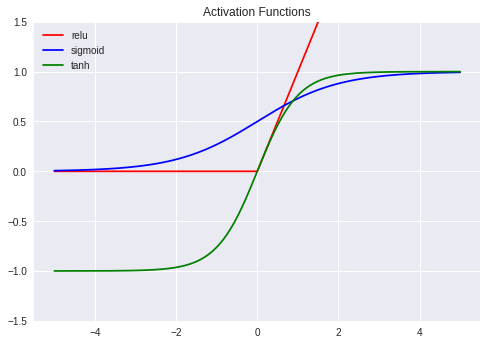

In [17]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
x = torch.linspace(-5,5,1000)
x = Variable(x)

# using activation function 
y_relu = F.relu(x)
y_sigmoid = F.sigmoid(x)
y_tanh = F.tanh(x)



# plt to visualize these activation function
plt.plot(x.data.numpy(), y_relu.data.numpy(), c='red', label='relu')
plt.plot(x.data.numpy(), y_sigmoid.data.numpy(), c='blue', label='sigmoid')
plt.plot(x.data.numpy(), y_tanh.data.numpy(), c='green', label='tanh')
plt.plot()
plt.ylim((-1.5, 1.5))
plt.title("Activation Functions")
plt.legend(loc='best');


In [0]:
"""# When the output is non scalar

x = Variable(torch.randn(10), requires_grad=True)
print(x)
y = x ** 2
print(y)

#grad = torch.randn(10)
#print(grad)

torch.autograd.backward([y], [x])

"""